<a href="https://colab.research.google.com/github/fantaxiah/DeepLearningSpring23/blob/main/MATH8334FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import check_array
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency
from sklearn.metrics import precision_score, f1_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
pd.set_option('display.max_columns', None)  #Display all columns
pd.set_option('display.width', None)  #Allow for a wider display

csv_file_path = '/content/allData2.csv' #Import my file
df= pd.read_csv(csv_file_path) #Read the CSV file into a dataframe

df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CASEID  AGE  MARSTAT PREGNOWQ RHADSEX  LIFEPRTS EVERUSED PILL1 CONDOM2 IUD3 DEPOPROV4  \
0      34156   43        6       No     Yes         1       No    No      No  Yes        No   
1      40081   33        1       No     Yes         4      Yes   Yes     Yes   No        No   
2      32817   27        6       No     Yes         2      Yes    No     Yes   No        No   
3      39968   37        6       No     Yes        25      Yes   Yes     Yes  Yes       Yes   
4      27121   23        6       No     Yes        10      Yes   Yes     Yes  Yes        No   
...      ...  ...      ...      ...     ...       ...      ...   ...     ...  ...       ...   
1995   32598   21        6       No     Yes         2       No    No      No  NaN        No   
1996   39070   38        4       No     Yes         9      Yes   Yes     Yes  NaN        No   
1997   37485   25        6       No     Yes        26      Yes   Yes     Yes  NaN        No   
1998   33633   40        1       No     Yes         2      Yes   Yes     Yes  NaN        No   
1999   36078   29        6       No     Yes         1      Yes   Yes     Yes  NaN        No   

     WIDTHDRAW5 DIAPHRAGM6 IMPLANT7 PATCH8 RING9  REASON1  REASON2  REASON3  REASON4  REASON5  \
0            No         No       No     No    No      1.0        7      NaN        3        9   
1           Yes         No       No     No    No      6.0        3      4.0        7        7   
2            No         No       No     No    No      4.0        7      7.0        3        9   
3           Yes         No       No     No    No      7.0        5      2.0        5        5   
4           Yes         No       No    Yes    No      2.0        7     10.0        3        9   
...         ...        ...      ...    ...   ...      ...      ...      ...      ...      ...   
1995         No         No       No     No    No      8.0        7      3.0        9        8   
1996        Yes         No       No     No    No      5.0        6      6.0        3        9   
1997        Yes         No       No     No    No      9.0        7      1.0        3        9   
1998         No         No       No     No    No      1.0        9      5.0        7        1   
1999         No         No       No     No    No      6.0        7      7.0        3        4   

      REASON6  REASON7  REASON8  REASON9 EMRGNCY BTHCON MEDTST  
0         7.0        5      2.0        7      No     No     No  
1         3.0        3      3.0        8      No     No     No  
2         7.0        2      8.0        7      No    Yes     No  
3         5.0        3      3.0        7     Yes    Yes    Yes  
4         7.0        8      3.0        1      No     No     No  
...       ...      ...      ...      ...     ...    ...    ...  
1995      3.0        3      2.0        2      No    Yes    Yes  
1996      7.0        7      8.0        7      No     No     No  
1997      5.0        3      2.0        2      No    Yes     No  
1998      7.0        5      4.0        3      No     No     No  
1999      2.0        3      2.0        2      No    Yes    Yes  

[2000 rows x 28 columns]

In [6]:
    df['TOTAL_CON'] = None  #Keep track of total amount of contraceptives person has used.
    columns_to_loop = ['PILL1', 'CONDOM2','IUD3','DEPOPROV4','WIDTHDRAW5','DIAPHRAGM6','IMPLANT7','PATCH8','RING9']

    #Search every row of df
    for index, row in df.iterrows():
      total = 0
      #Search all necessary columns and check if 'Yes'
      #If 'Yes', then increment total and add to METHOD1, METHOD2, METHOD3 accordingly
      for column_name in columns_to_loop:
            #Access the values of the current column
            column_value = df.loc[index,column_name]
            #Process the values as needed
            if column_value == 'Yes':
              total = total + 1
              #Total contraceptives used are counted into total
              df.loc[index, 'TOTAL_CON'] = total

#The method columns in df should be altered to include the first 3 contraceptives of a row where the person put 'Yes'
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CASEID  AGE  MARSTAT PREGNOWQ RHADSEX  LIFEPRTS EVERUSED PILL1 CONDOM2 IUD3 DEPOPROV4  \
0      34156   43        6       No     Yes         1       No    No      No  Yes        No   
1      40081   33        1       No     Yes         4      Yes   Yes     Yes   No        No   
2      32817   27        6       No     Yes         2      Yes    No     Yes   No        No   
3      39968   37        6       No     Yes        25      Yes   Yes     Yes  Yes       Yes   
4      27121   23        6       No     Yes        10      Yes   Yes     Yes  Yes        No   
...      ...  ...      ...      ...     ...       ...      ...   ...     ...  ...       ...   
1995   32598   21        6       No     Yes         2       No    No      No  NaN        No   
1996   39070   38        4       No     Yes         9      Yes   Yes     Yes  NaN        No   
1997   37485   25        6       No     Yes        26      Yes   Yes     Yes  NaN        No   
1998   33633   40        1       No     Yes         2      Yes   Yes     Yes  NaN        No   
1999   36078   29        6       No     Yes         1      Yes   Yes     Yes  NaN        No   

     WIDTHDRAW5 DIAPHRAGM6 IMPLANT7 PATCH8 RING9  REASON1  REASON2  REASON3  REASON4  REASON5  \
0            No         No       No     No    No      1.0        7      NaN        3        9   
1           Yes         No       No     No    No      6.0        3      4.0        7        7   
2            No         No       No     No    No      4.0        7      7.0        3        9   
3           Yes         No       No     No    No      7.0        5      2.0        5        5   
4           Yes         No       No    Yes    No      2.0        7     10.0        3        9   
...         ...        ...      ...    ...   ...      ...      ...      ...      ...      ...   
1995         No         No       No     No    No      8.0        7      3.0        9        8   
1996        Yes         No       No     No    No      5.0        6      6.0        3        9   
1997        Yes         No       No     No    No      9.0        7      1.0        3        9   
1998         No         No       No     No    No      1.0        9      5.0        7        1   
1999         No         No       No     No    No      6.0        7      7.0        3        4   

      REASON6  REASON7  REASON8  REASON9 EMRGNCY BTHCON MEDTST TOTAL_CON  
0         7.0        5      2.0        7      No     No     No         1  
1         3.0        3      3.0        8      No     No     No         3  
2         7.0        2      8.0        7      No    Yes     No         1  
3         5.0        3      3.0        7     Yes    Yes    Yes         5  
4         7.0        8      3.0        1      No     No     No         5  
...       ...      ...      ...      ...     ...    ...    ...       ...  
1995      3.0        3      2.0        2      No    Yes    Yes      None  
1996      7.0        7      8.0        7      No     No     No         3  
1997      5.0        3      2.0        2      No    Yes     No         3  
1998      7.0        5      4.0        3      No     No     No         2  
1999      2.0        3      2.0        2      No    Yes    Yes         2  

[2000 rows x 29 columns]

In [7]:
df2 = df[df['EVERUSED'] != 'No'] #Remove rows with the answer 'No' in EVERUSED since they have to meaningful use
j_df = df2[df2['TOTAL_CON'] != 0] #Remove rows with people who have never used contraceptives.
df2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CASEID  AGE  MARSTAT PREGNOWQ RHADSEX  LIFEPRTS EVERUSED PILL1 CONDOM2 IUD3 DEPOPROV4  \
1      40081   33        1       No     Yes         4      Yes   Yes     Yes   No        No   
2      32817   27        6       No     Yes         2      Yes    No     Yes   No        No   
3      39968   37        6       No     Yes        25      Yes   Yes     Yes  Yes       Yes   
4      27121   23        6       No     Yes        10      Yes   Yes     Yes  Yes        No   
5      39492   33        6       No     Yes        30      Yes   Yes     Yes   No        No   
...      ...  ...      ...      ...     ...       ...      ...   ...     ...  ...       ...   
1994   37693   39        1       No     Yes         3      Yes   Yes      No  Yes        No   
1996   39070   38        4       No     Yes         9      Yes   Yes     Yes  NaN        No   
1997   37485   25        6       No     Yes        26      Yes   Yes     Yes  NaN        No   
1998   33633   40        1       No     Yes         2      Yes   Yes     Yes  NaN        No   
1999   36078   29        6       No     Yes         1      Yes   Yes     Yes  NaN        No   

     WIDTHDRAW5 DIAPHRAGM6 IMPLANT7 PATCH8 RING9  REASON1  REASON2  REASON3  REASON4  REASON5  \
1           Yes         No       No     No    No      6.0        3      4.0        7        7   
2            No         No       No     No    No      4.0        7      7.0        3        9   
3           Yes         No       No     No    No      7.0        5      2.0        5        5   
4           Yes         No       No    Yes    No      2.0        7     10.0        3        9   
5           Yes         No       No     No   Yes     10.0        2      3.0        2        2   
...         ...        ...      ...    ...   ...      ...      ...      ...      ...      ...   
1994         No         No       No     No    No      3.0        4      9.0        3        9   
1996        Yes         No       No     No    No      5.0        6      6.0        3        9   
1997        Yes         No       No     No    No      9.0        7      1.0        3        9   
1998         No         No       No     No    No      1.0        9      5.0        7        1   
1999         No         No       No     No    No      6.0        7      7.0        3        4   

      REASON6  REASON7  REASON8  REASON9 EMRGNCY BTHCON MEDTST TOTAL_CON  
1         3.0        3      3.0        8      No     No     No         3  
2         7.0        2      8.0        7      No    Yes     No         1  
3         5.0        3      3.0        7     Yes    Yes    Yes         5  
4         7.0        8      3.0        1      No     No     No         5  
5         2.0        3      1.0        4     Yes    Yes     No         4  
...       ...      ...      ...      ...     ...    ...    ...       ...  
1994      7.0        3     10.0        5      No     No     No         2  
1996      7.0        7      8.0        7      No     No     No         3  
1997      5.0        3      2.0        2      No    Yes     No         3  
1998      7.0        5      4.0        3      No     No     No         2  
1999      2.0        3      2.0        2      No    Yes    Yes         2  

[1724 rows x 29 columns]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


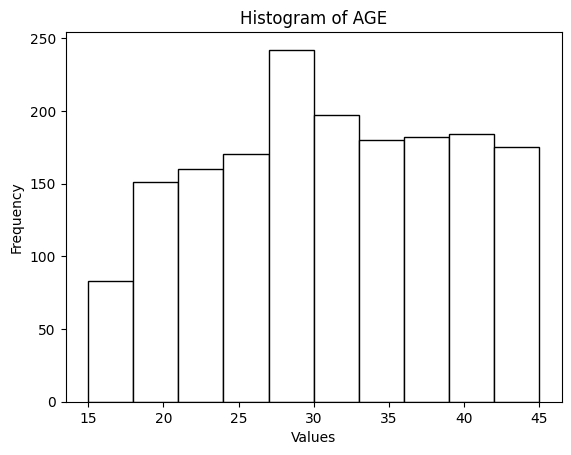

In [8]:
target_column = 'AGE'
#Create a histogram
plt.hist(df2[target_column], bins=10, color='white', edgecolor='black')

#Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title(f'Histogram of {target_column}')

#Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


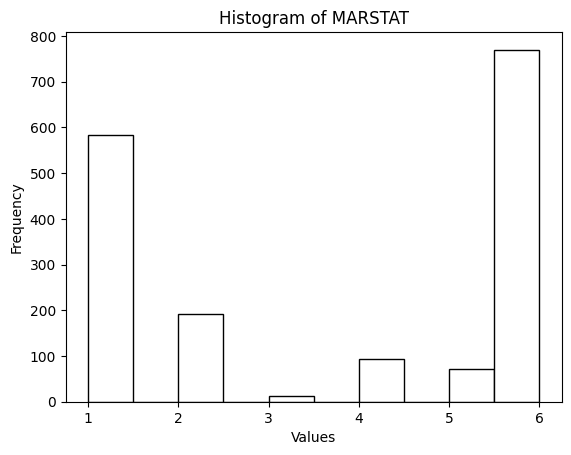

In [9]:
target_column = 'MARSTAT'
#Create a histogram
plt.hist(df2[target_column], bins=10, color='white', edgecolor='black')

#Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title(f'Histogram of {target_column}')

#Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


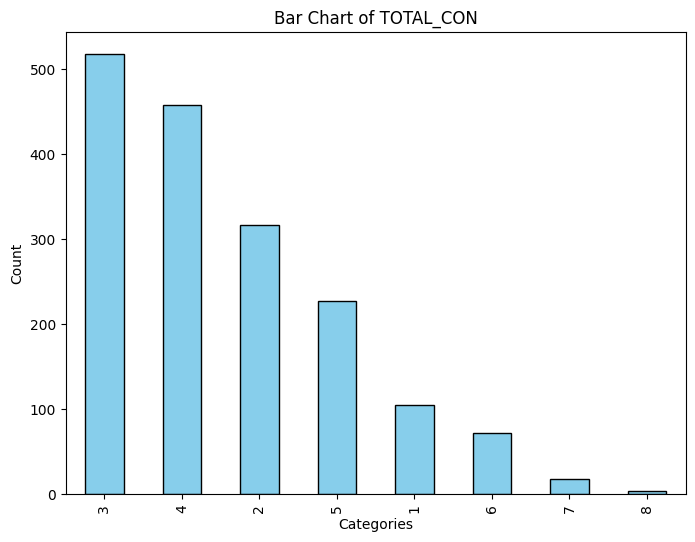

In [10]:
target_column = 'TOTAL_CON'
#Count the occurrences of each value in the target column
value_counts = j_df[target_column].value_counts()

#Create a bar chart
plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

#Add labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title(f'Bar Chart of {target_column}')

#Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


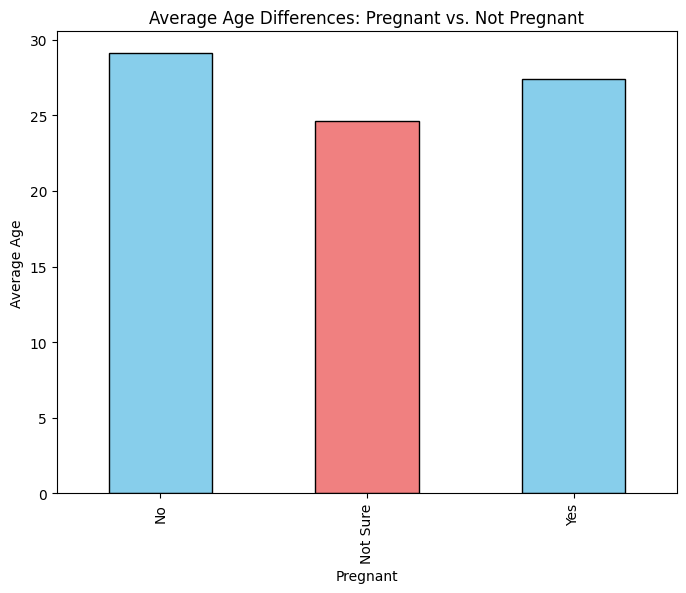

In [20]:
plt.figure(figsize=(8, 6))
df.groupby('PREGNOWQ')['AGE'].mean().plot(kind='bar', color=['skyblue', 'lightcoral'], edgecolor='black')

#Add labels and title
plt.xlabel('Pregnant')
plt.ylabel('Average Age')
plt.title('Average Age Differences: Pregnant vs. Not Pregnant')

#Show the plot
plt.show()

In [11]:
# Check for NaN values in the entire DataFrame
nan_info = df2.isna().sum()

# Display the count of NaN values for each column
print(nan_info)

#Drop the NaN values in df2
df3 = df2.dropna()
df3

CASEID         0
AGE            0
MARSTAT        0
PREGNOWQ       1
RHADSEX        0
LIFEPRTS       0
EVERUSED       0
PILL1          0
CONDOM2       33
IUD3           4
DEPOPROV4      0
WIDTHDRAW5    33
DIAPHRAGM6    33
IMPLANT7      34
PATCH8         0
RING9          0
REASON1        5
REASON2        0
REASON3        4
REASON4        0
REASON5        0
REASON6        1
REASON7        0
REASON8        0
REASON9        0
EMRGNCY       33
BTHCON         0
MEDTST         0
TOTAL_CON      7
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CASEID  AGE  MARSTAT PREGNOWQ RHADSEX  LIFEPRTS EVERUSED PILL1 CONDOM2 IUD3 DEPOPROV4  \
1      40081   33        1       No     Yes         4      Yes   Yes     Yes   No        No   
2      32817   27        6       No     Yes         2      Yes    No     Yes   No        No   
3      39968   37        6       No     Yes        25      Yes   Yes     Yes  Yes       Yes   
4      27121   23        6       No     Yes        10      Yes   Yes     Yes  Yes        No   
5      39492   33        6       No     Yes        30      Yes   Yes     Yes   No        No   
...      ...  ...      ...      ...     ...       ...      ...   ...     ...  ...       ...   
1990   37077   39        2       No     Yes         4      Yes    No      No   No        No   
1991   36797   31        6       No     Yes        11      Yes   Yes     Yes  Yes       Yes   
1992   34771   38        5       No     Yes         6      Yes   Yes     Yes  Yes       Yes   
1993   41335   16        6       No     Yes         6      Yes   Yes      No  Yes        No   
1994   37693   39        1       No     Yes         3      Yes   Yes      No  Yes        No   

     WIDTHDRAW5 DIAPHRAGM6 IMPLANT7 PATCH8 RING9  REASON1  REASON2  REASON3  REASON4  REASON5  \
1           Yes         No       No     No    No      6.0        3      4.0        7        7   
2            No         No       No     No    No      4.0        7      7.0        3        9   
3           Yes         No       No     No    No      7.0        5      2.0        5        5   
4           Yes         No       No    Yes    No      2.0        7     10.0        3        9   
5           Yes         No       No     No   Yes     10.0        2      3.0        2        2   
...         ...        ...      ...    ...   ...      ...      ...      ...      ...      ...   
1990         No        Yes       No     No    No      4.0        8      7.0        1        9   
1991        Yes         No       No     No    No      7.0        7      2.0        4        5   
1992        Yes         No       No     No    No      2.0        7      8.0        3        9   
1993        Yes         No       No     No    No     10.0        1      4.0        6        2   
1994         No         No       No     No    No      3.0        4      9.0        3        9   

      REASON6  REASON7  REASON8  REASON9 EMRGNCY BTHCON MEDTST TOTAL_CON  
1         3.0        3      3.0        8      No     No     No         3  
2         7.0        2      8.0        7      No    Yes     No         1  
3         5.0        3      3.0        7     Yes    Yes    Yes         5  
4         7.0        8      3.0        1      No     No     No         5  
5         2.0        3      1.0        4     Yes    Yes     No         4  
...       ...      ...      ...      ...     ...    ...    ...       ...  
1990      6.0        3      7.0        9      No     No     No         1  
1991      7.0        6      2.0        2      No     No     No         5  
1992      9.0        3      3.0        1      No     No     No         5  
1993      7.0        9      2.0        2      No    Yes    Yes         3  
1994      7.0        3     10.0        5      No     No     No         2  

[1668 rows x 29 columns]

In [22]:
#Number of 'Yes' in all columns
df3['PILL1'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Yes    1300
No      368
Name: PILL1, dtype: int64

In [23]:
df3['CONDOM2'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Yes    1582
No       86
Name: CONDOM2, dtype: int64

In [24]:
df3['IUD3'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No     887
Yes    781
Name: IUD3, dtype: int64

In [25]:
df3['DEPOPROV4'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No     1313
Yes     355
Name: DEPOPROV4, dtype: int64

In [26]:
df3['WIDTHDRAW5'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Yes    996
No     672
Name: WIDTHDRAW5, dtype: int64

In [27]:
df3['DIAPHRAGM6'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No     1355
Yes     313
Name: DIAPHRAGM6, dtype: int64

In [28]:
df3['IMPLANT7'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No     1584
Yes      84
Name: IMPLANT7, dtype: int64

In [29]:
df3['PATCH8'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No     1446
Yes     222
Name: PATCH8, dtype: int64

In [30]:
df3['RING9'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No     1563
Yes     105
Name: RING9, dtype: int64

In [12]:
# Mapping dictionary
mapping_dict = {'Yes': 1, 'No': 0}

# Apply mapping to the specified columns
df3.replace({'PILL1': mapping_dict, 'CONDOM2': mapping_dict, 'IUD3': mapping_dict, 'DEPOPROV4': mapping_dict, 'WIDTHDRAW5': mapping_dict, 'DIAPHRAGM6': mapping_dict, 'IMPLANT7': mapping_dict, 'PATCH8': mapping_dict, 'RING9': mapping_dict}, inplace=True)

# Display the updated DataFrame
print(df3)

      CASEID  AGE  MARSTAT PREGNOWQ RHADSEX  LIFEPRTS EVERUSED  PILL1  CONDOM2  IUD3  DEPOPROV4  \
1      40081   33        1       No     Yes         4      Yes      1        1     0          0   
2      32817   27        6       No     Yes         2      Yes      0        1     0          0   
3      39968   37        6       No     Yes        25      Yes      1        1     1          1   
4      27121   23        6       No     Yes        10      Yes      1        1     1          0   
5      39492   33        6       No     Yes        30      Yes      1        1     0          0   
...      ...  ...      ...      ...     ...       ...      ...    ...      ...   ...        ...   
1990   37077   39        2       No     Yes         4      Yes      0        0     0          0   
1991   36797   31        6       No     Yes        11      Yes      1        1     1          1   
1992   34771   38        5       No     Yes         6      Yes      1        1     1          1   
1993   413

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-12-c9b874dad4e8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.replace({'PILL1': mapping_dict, 'CONDOM2': mapping_dict, 'IUD3': mapping_dict, 'DEPOPROV4': mapping_dict, 'WIDTHDRAW5': mapping_dict, 'DIAPHRAGM6': mapping_dict, 'IMPLANT7': mapping_dict, 'PATCH8': mapping_dict, 'RING9': mapping_dict}, inplace=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


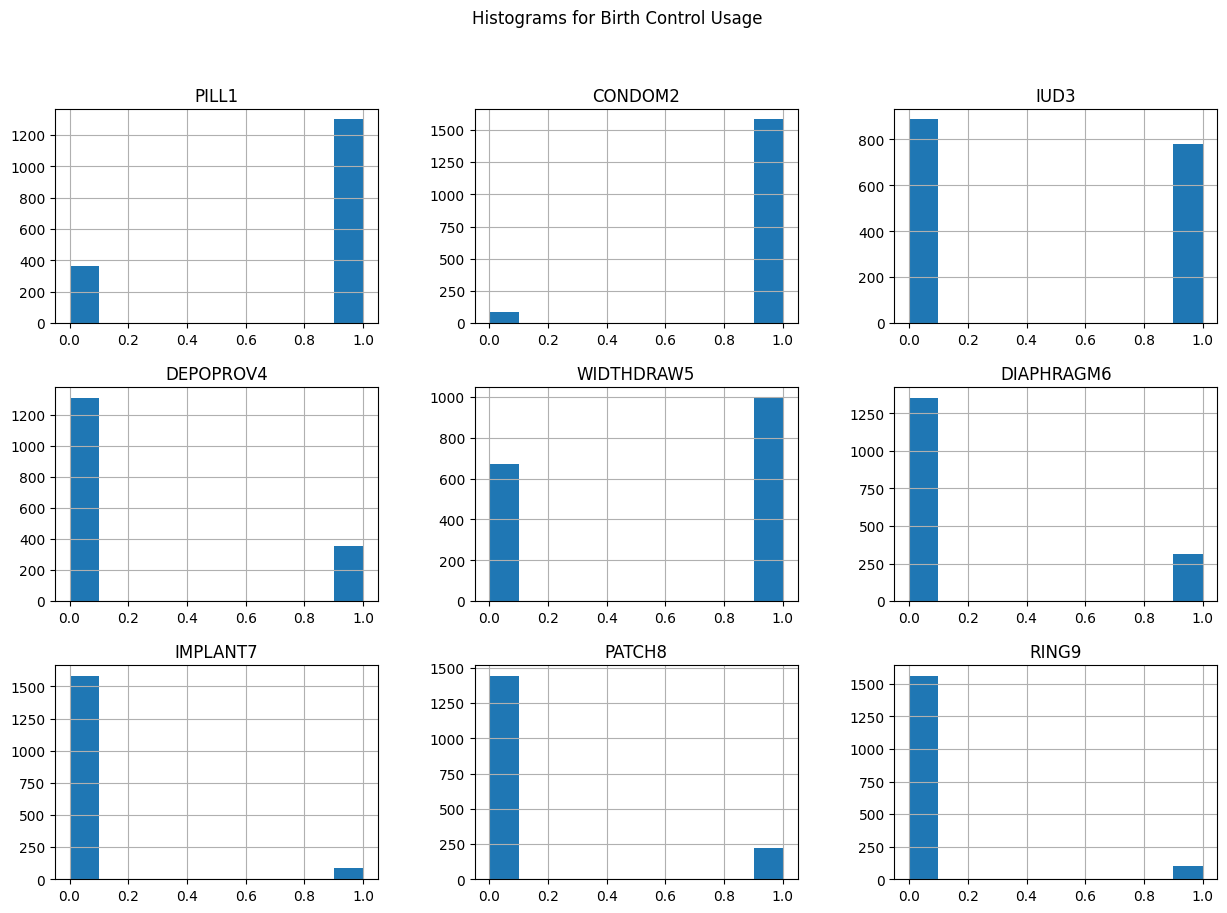

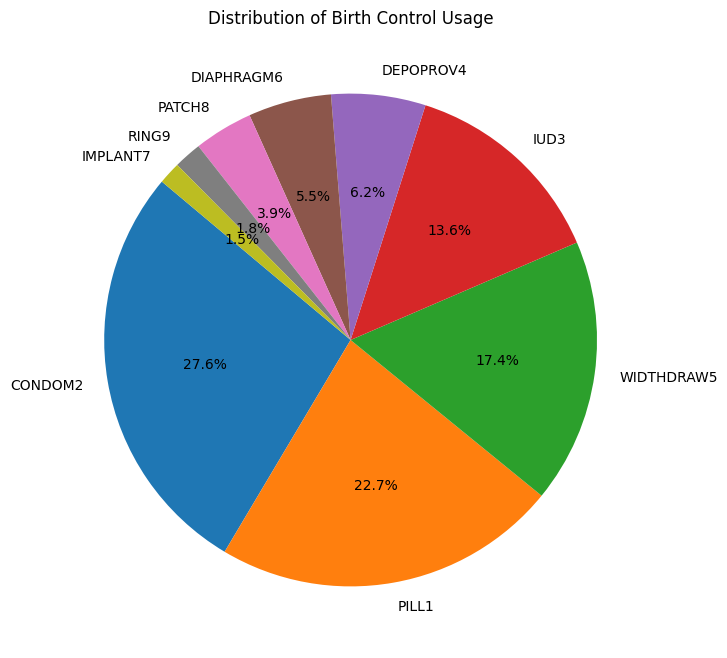

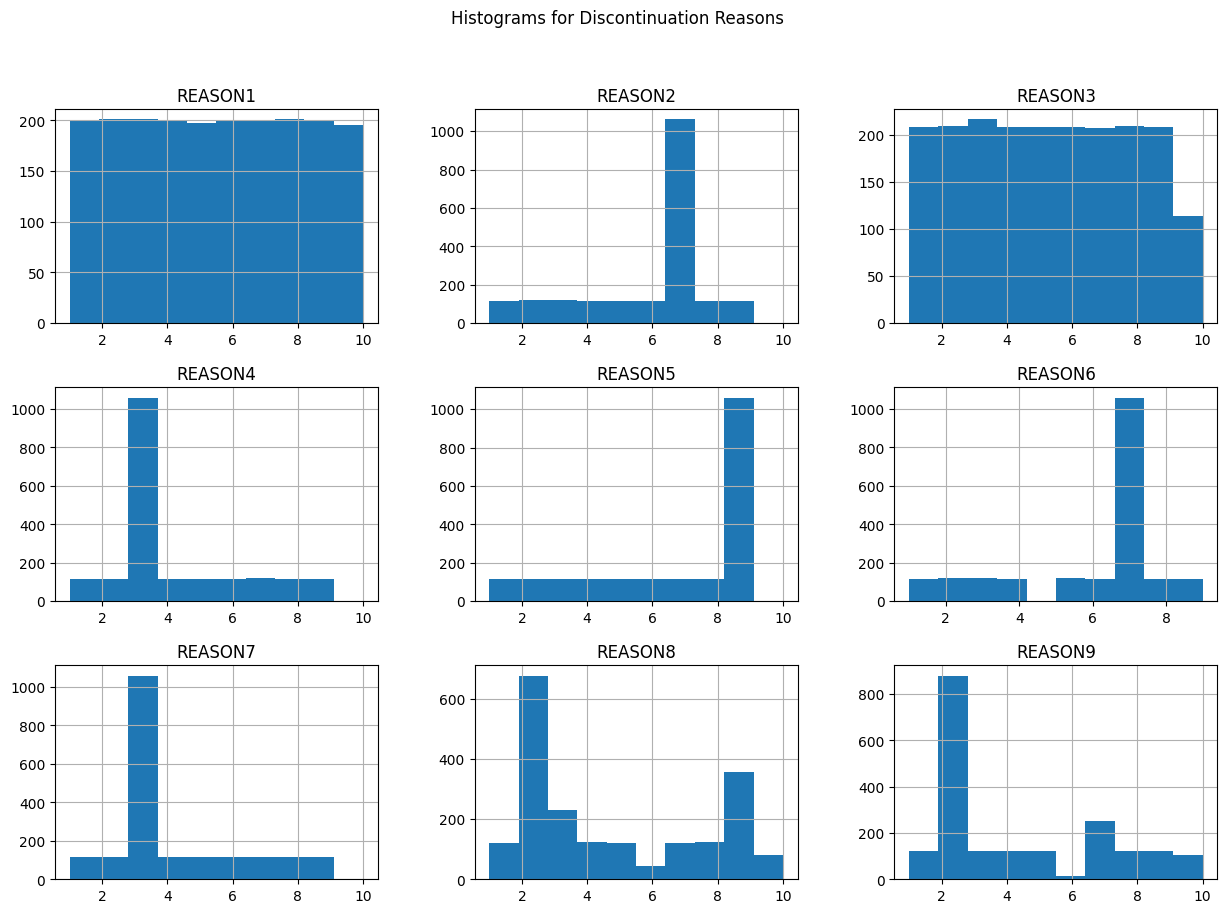

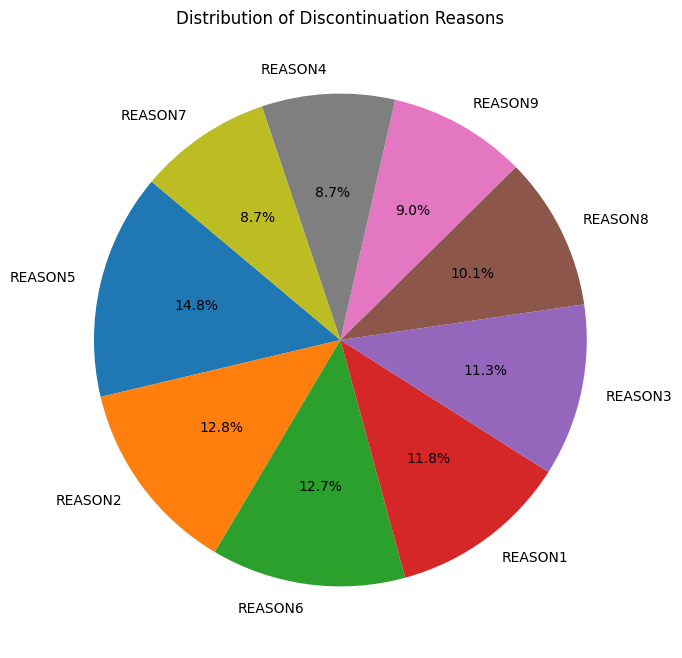

In [13]:
# Assuming 'usage_columns' are columns related to birth control usage, and 'discontinuation_columns' are reasons columns
usage_columns = df3[['PILL1', 'CONDOM2', 'IUD3', 'DEPOPROV4', 'WIDTHDRAW5', 'DIAPHRAGM6', 'IMPLANT7', 'PATCH8', 'RING9']]
discontinuation_columns = df[['REASON1', 'REASON2', 'REASON3', 'REASON4', 'REASON5', 'REASON6', 'REASON7', 'REASON8', 'REASON9']]

# Summary statistics for birth control usage
usage_summary = usage_columns.describe()

# Histograms for birth control usage
usage_columns.hist(bins=10, figsize=(15, 10))
plt.suptitle('Histograms for Birth Control Usage')
plt.show()

# Pie chart for distribution of birth control usage
usage_distribution = usage_columns.sum().sort_values(ascending=False)
plt.figure(figsize=(8, 8))
plt.pie(usage_distribution, labels=usage_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Birth Control Usage')
plt.show()

# Summary statistics for discontinuation reasons
discontinuation_summary = discontinuation_columns.describe()

# Histograms for discontinuation reasons
discontinuation_columns.hist(bins=10, figsize=(15, 10))
plt.suptitle('Histograms for Discontinuation Reasons')
plt.show()

# Pie chart for distribution of discontinuation reasons
discontinuation_distribution = discontinuation_columns.sum().sort_values(ascending=False)
plt.figure(figsize=(8, 8))
plt.pie(discontinuation_distribution, labels=discontinuation_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Discontinuation Reasons')
plt.show()

In [33]:
# Check for NaN values in the entire DataFrame
nan_info = df3.isna().sum()

# Display the count of NaN values for each column
print(nan_info)

CASEID        0
AGE           0
MARSTAT       0
PREGNOWQ      0
RHADSEX       0
LIFEPRTS      0
EVERUSED      0
PILL1         0
CONDOM2       0
IUD3          0
DEPOPROV4     0
WIDTHDRAW5    0
DIAPHRAGM6    0
IMPLANT7      0
PATCH8        0
RING9         0
REASON1       0
REASON2       0
REASON3       0
REASON4       0
REASON5       0
REASON6       0
REASON7       0
REASON8       0
REASON9       0
EMRGNCY       0
BTHCON        0
MEDTST        0
TOTAL_CON     0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
df3 = df3.drop('CASEID', axis=1)
# Check unique values and their counts for each column
for column in df3.columns:
    unique_values = df3[column].unique()
    print(f"Column: {column}, Unique Values: {unique_values}, Value Counts: {df[column].value_counts()}")



Column: AGE, Unique Values: [33 27 37 23 25 24 28 44 34 22 42 39 19 38 41 30 26 43 35 29 31 17 15 18
 32 40 36 21 20 16 45], Value Counts: 28    95
27    88
19    80
18    80
31    76
16    76
15    72
17    71
29    71
40    70
30    69
39    69
34    67
20    67
38    67
24    66
26    65
43    63
44    63
35    62
37    62
23    61
22    60
36    60
32    58
33    55
21    53
42    52
25    52
41    48
45     2
Name: AGE, dtype: int64
Column: MARSTAT, Unique Values: [1 6 2 4 5 3], Value Counts: 6    1035
1     592
2     192
4      94
5      74
3      13
Name: MARSTAT, dtype: int64
Column: PREGNOWQ, Unique Values: ['No' 'Yes' 'Not Sure'], Value Counts: No          1921
Yes           75
Not Sure       3
Name: PREGNOWQ, dtype: int64
Column: RHADSEX, Unique Values: ['Yes'], Value Counts: Yes    1708
No      292
Name: RHADSEX, dtype: int64
Column: LIFEPRTS, Unique Values: [ 4  2 25 10 30  1  5 15  8 12  3  6 13  9 11 17 23  7 20 22 19 32 40 50
 18 28 45 14 35 98 24 36 16 27 99 21], Value

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Correlation

In [35]:
# Calculate correlation coefficients
correlation_matrix = df3.corr()

# Display the correlation matrix
print(correlation_matrix)

                 AGE   MARSTAT  LIFEPRTS     PILL1   CONDOM2      IUD3  DEPOPROV4  WIDTHDRAW5  \
AGE         1.000000 -0.426030  0.095117  0.195199 -0.113203 -0.004008  -0.084562    0.034449   
MARSTAT    -0.426030  1.000000  0.105664 -0.146533  0.149132  0.015473   0.070592    0.025021   
LIFEPRTS    0.095117  0.105664  1.000000  0.084801  0.104508 -0.008593   0.078909    0.199014   
PILL1       0.195199 -0.146533  0.084801  1.000000  0.045939  0.006684   0.064716    0.111250   
CONDOM2    -0.113203  0.149132  0.104508  0.045939  1.000000  0.039485  -0.011238    0.101444   
IUD3       -0.004008  0.015473 -0.008593  0.006684  0.039485  1.000000  -0.032935   -0.005763   
DEPOPROV4  -0.084562  0.070592  0.078909  0.064716 -0.011238 -0.032935   1.000000    0.012010   
WIDTHDRAW5  0.034449  0.025021  0.199014  0.111250  0.101444 -0.005763   0.012010    1.000000   
DIAPHRAGM6  0.091149 -0.094928  0.019488 -0.029420  0.021789  0.016757  -0.077340    0.156850   
IMPLANT7    0.110402 -0.104819

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-35-6202ef544c12>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df3.corr()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


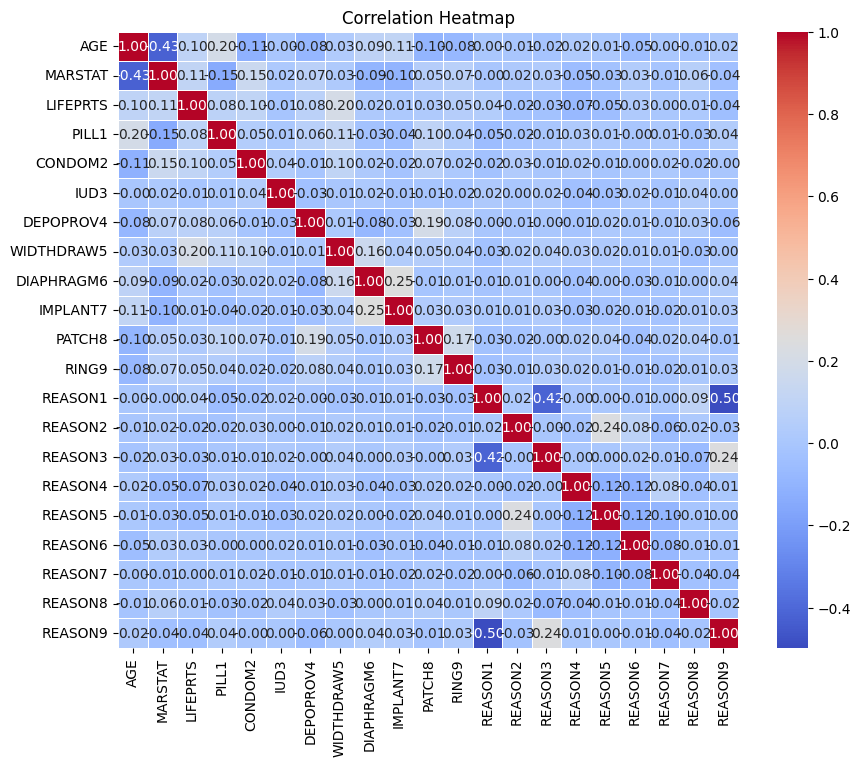

In [36]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

Apriori

In [37]:
# Drop the specified columns
df4 = df3[columns_to_loop]


# Assuming df is your DataFrame with binary data
frequent_itemsets = apriori(df4, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the rules
print(rules)

                        antecedents                   consequents  antecedent support  \
0                         (CONDOM2)                       (PILL1)            0.948441   
1                           (PILL1)                     (CONDOM2)            0.779376   
2                            (IUD3)                       (PILL1)            0.468225   
3                       (DEPOPROV4)                       (PILL1)            0.212830   
4                           (PILL1)                  (WIDTHDRAW5)            0.779376   
..                              ...                           ...                 ...   
67  (WIDTHDRAW5, PILL1, DIAPHRAGM6)                     (CONDOM2)            0.110312   
68            (CONDOM2, DIAPHRAGM6)           (PILL1, WIDTHDRAW5)            0.179856   
69              (PILL1, DIAPHRAGM6)         (CONDOM2, WIDTHDRAW5)            0.141487   
70         (WIDTHDRAW5, DIAPHRAGM6)              (CONDOM2, PILL1)            0.142086   
71                   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


RF

In [36]:
x_columns_to_loop = ['REASON1','REASON2','REASON3','REASON4','REASON5','REASON6','REASON7','REASON8','REASON9']
y_columns_to_loop = ['PILL1','CONDOM2','IUD3','DEPOPROV4','WIDTHDRAW5','DIAPHRAGM6','IMPLANT7','PATCH8','RING9']
get_X_train = np.nan
get_y_train = np.nan

# Extracting feature and target columns
for x_column, y_column in zip(x_columns_to_loop, y_columns_to_loop):
    X = df3[[x_column]]
    y = df3[y_column]

    #Repeat for every method and corresponding reason, ie. CONDOM2 and REASON2, IUD3 and REASON3, etc.

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    get_X_train = X_train
    get_y_train = y_train

    # Create a Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the classifier on the training data
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)

    # Evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Analyzing {x_column}...Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Analyzing REASON1...Accuracy: 0.7904191616766467
Analyzing REASON2...Accuracy: 0.9461077844311377
Analyzing REASON3...Accuracy: 0.5029940119760479
Analyzing REASON4...Accuracy: 0.7934131736526946
Analyzing REASON5...Accuracy: 0.5988023952095808
Analyzing REASON6...Accuracy: 0.811377245508982
Analyzing REASON7...Accuracy: 0.9401197604790419
Analyzing REASON8...Accuracy: 0.8682634730538922
Analyzing REASON9...Accuracy: 0.9161676646706587


Log Reg

In [51]:
# Extracting feature and target columns
for x_column, y_column in zip(x_columns_to_loop, y_columns_to_loop):
    X = df3[[x_column]]
    y = df3[y_column]

    #Repeat for every method and corresponding reason, ie. CONDOM2 and REASON2, IUD3 and REASON3, etc.

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Logistic Regression
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)

    logreg_pred = logreg.predict(X_test)
    print("Logistic Regression Precision:", precision_score(y_test, logreg_pred, zero_division=1))
    print("Logistic Regression Classification Report:")
    print(classification_report(y_test, logreg_pred, zero_division=1))

Logistic Regression Precision: 0.7904191616766467
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        70
           1       0.79      1.00      0.88       264

    accuracy                           0.79       334
   macro avg       0.90      0.50      0.44       334
weighted avg       0.83      0.79      0.70       334

Logistic Regression Precision: 0.9461077844311377
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        18
           1       0.95      1.00      0.97       316

    accuracy                           0.95       334
   macro avg       0.97      0.50      0.49       334
weighted avg       0.95      0.95      0.92       334

Logistic Regression Precision: 1.0
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.50    

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Decision Tree

In [49]:
# Extracting feature and target columns
for x_column, y_column in zip(x_columns_to_loop, y_columns_to_loop):
    X = df3[[x_column]]
    y = df3[y_column]

    #Repeat for every method and corresponding reason, ie. CONDOM2 and REASON2, IUD3 and REASON3, etc.

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Decision Tree
    dtree = DecisionTreeClassifier()
    dtree.fit(X_train, y_train)

    dtree_pred = dtree.predict(X_test)
    print("Decision Tree Precision:", precision_score(y_test, dtree_pred, zero_division=1))
    print("Decision Tree Classification Report:")
    print(classification_report(y_test, dtree_pred, zero_division=1))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Decision Tree : 0.7904191616766467
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        70
           1       0.79      1.00      0.88       264

    accuracy                           0.79       334
   macro avg       0.90      0.50      0.44       334
weighted avg       0.83      0.79      0.70       334

Decision Tree : 0.9461077844311377
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        18
           1       0.95      1.00      0.97       316

    accuracy                           0.95       334
   macro avg       0.97      0.50      0.49       334
weighted avg       0.95      0.95      0.92       334

Decision Tree : 1.0
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       168
           1       1.00      0.00   

PCA

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


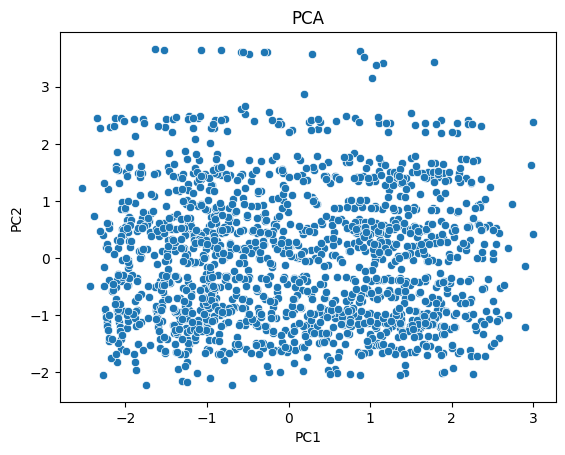

In [41]:
X = df3[['REASON1','REASON2','REASON3','REASON4','REASON5','REASON6','REASON7','REASON8','REASON9']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#Create a DataFrame with the principal components
columns = ['PC1', 'PC2']
df_pca = pd.DataFrame(data=X_pca, columns=columns)

df_combined = pd.concat([df_pca, y], axis=1)

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='PC1', y='PC2', data=df_combined)
plt.title('PCA')
plt.show()

KNN

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

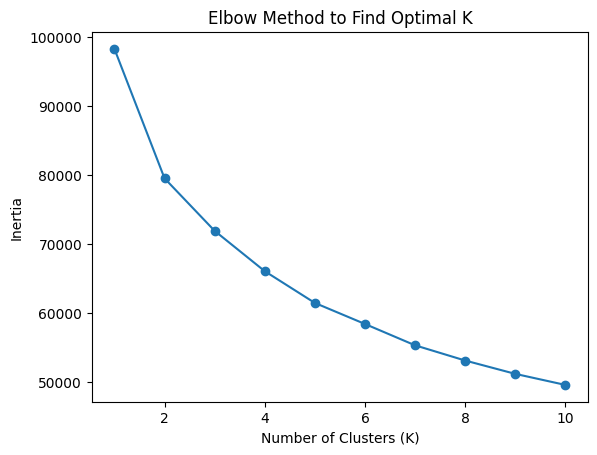

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


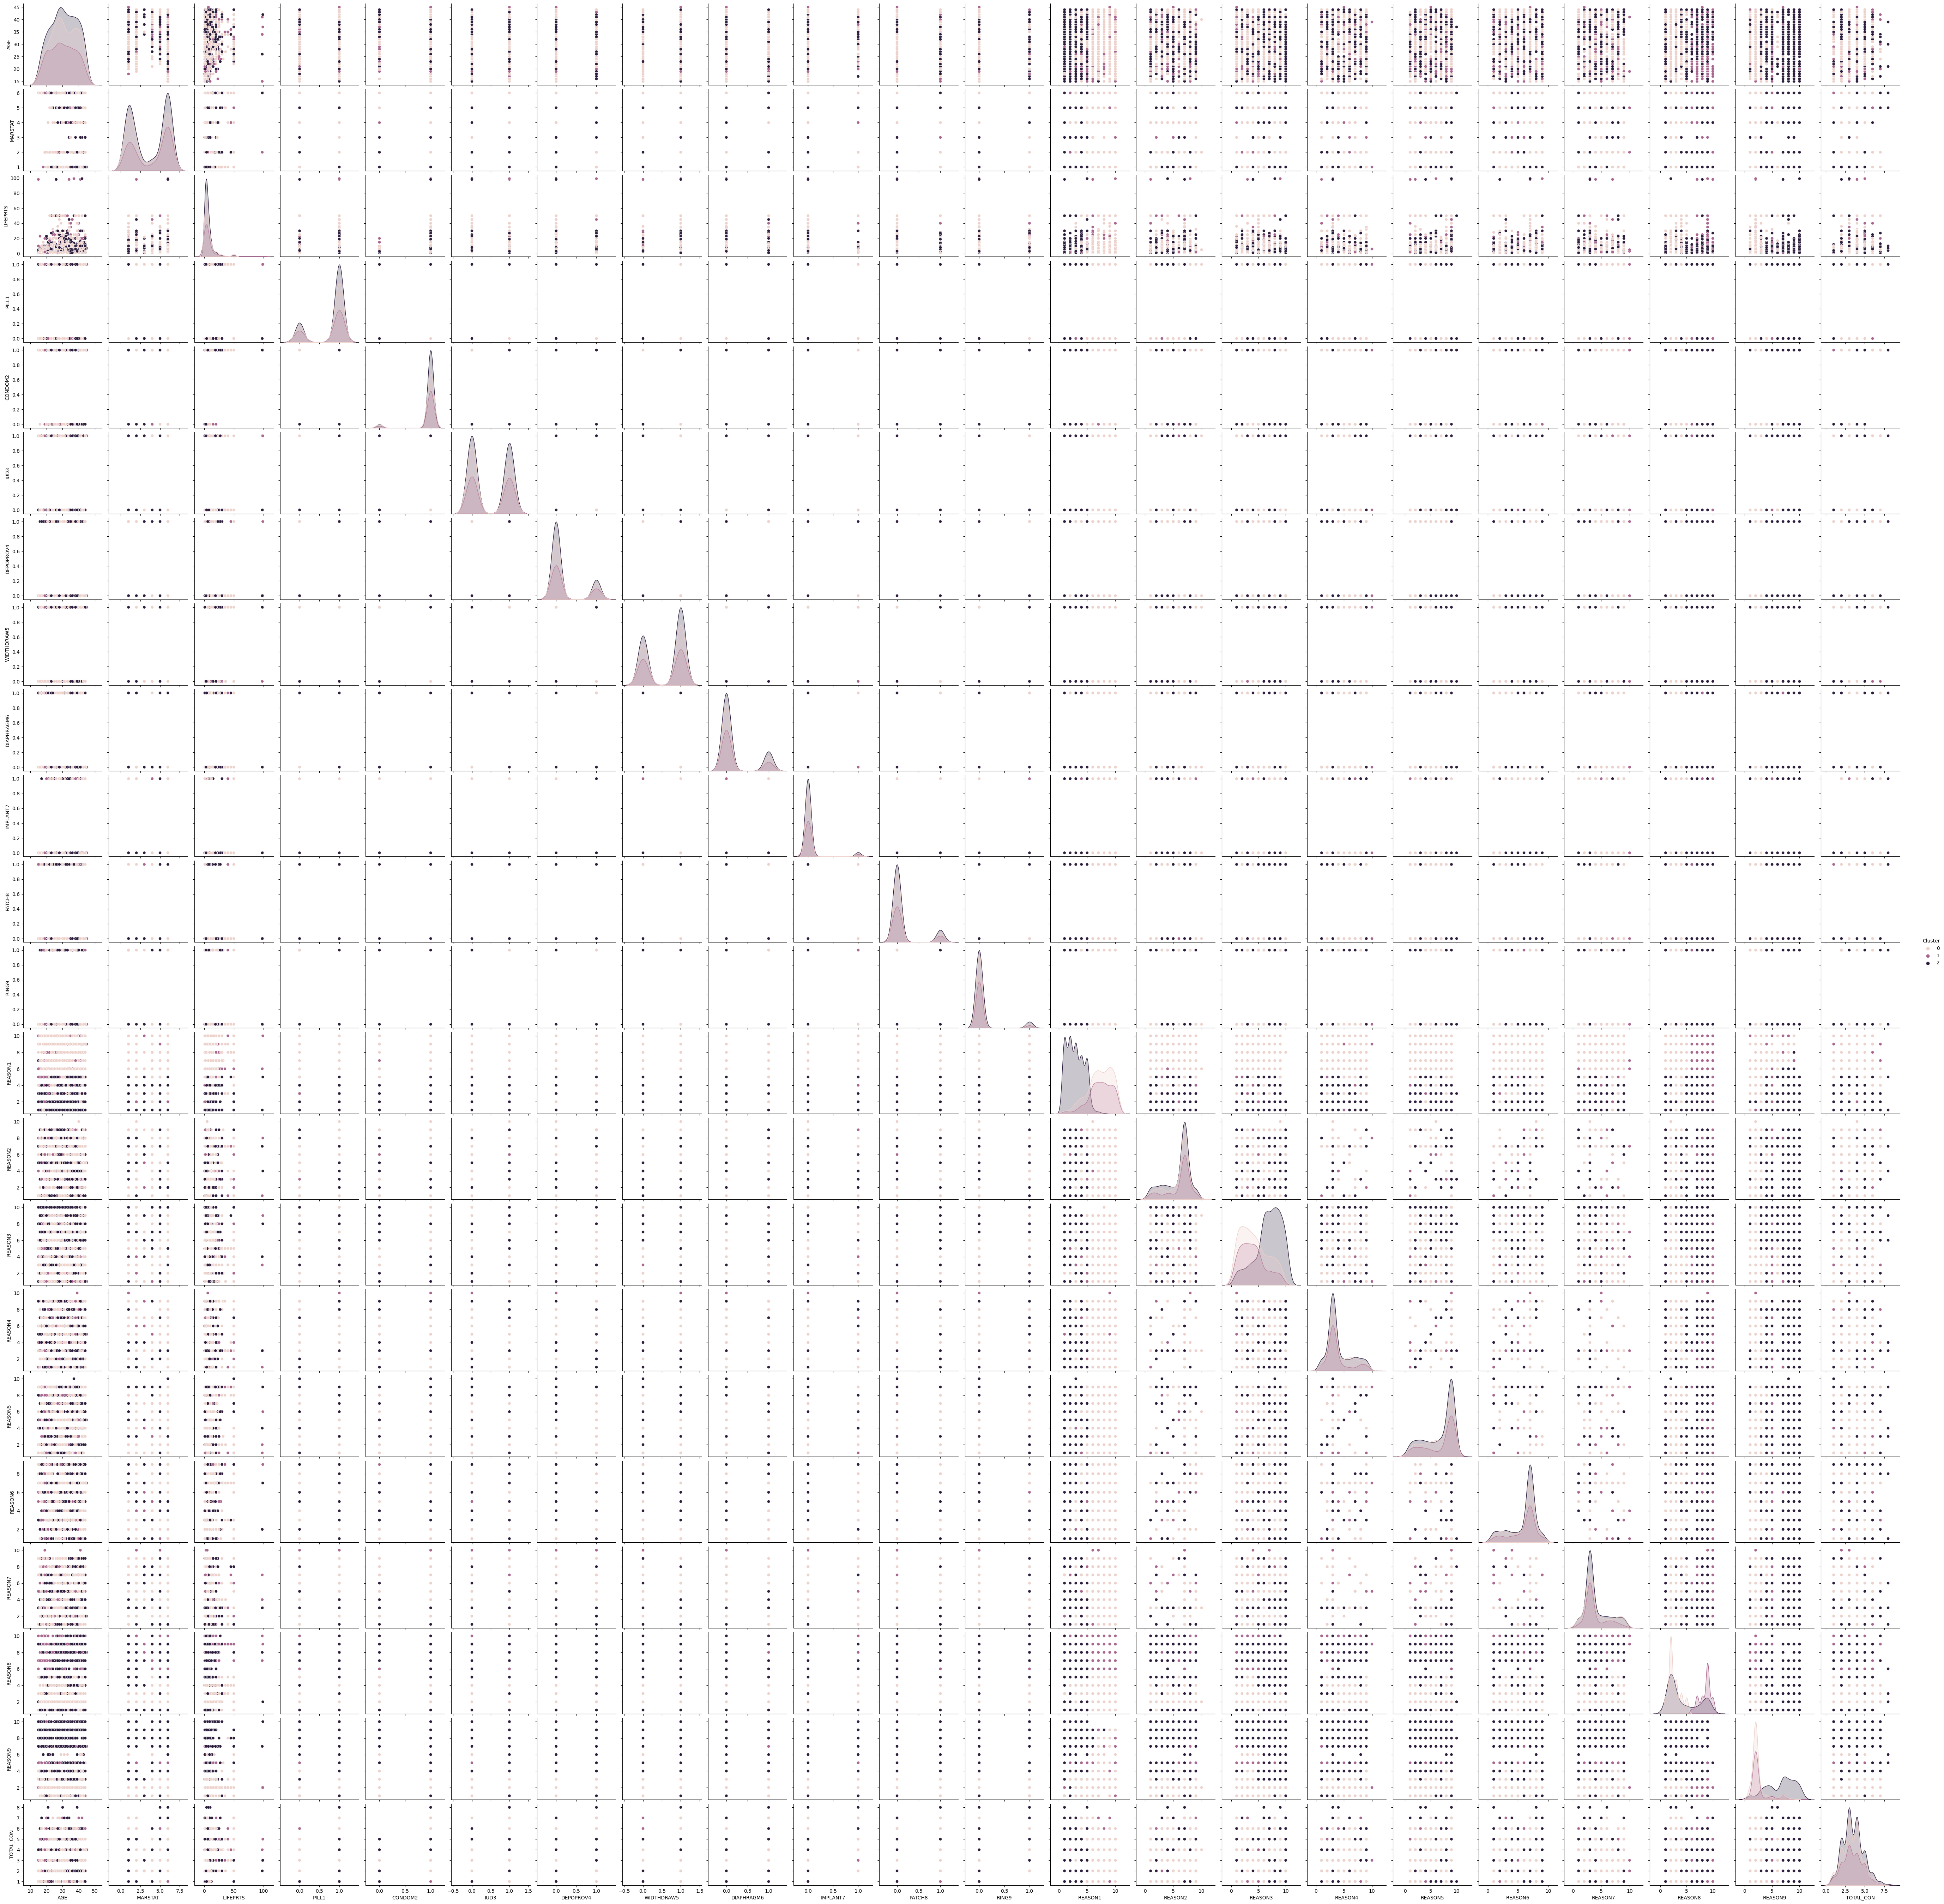

In [42]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal K')
plt.show()

#Choose the optimal K and apply K-Means clustering
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)

df3['Cluster'] = clusters[:len(df3)]

sns.pairplot(df3, hue='Cluster')
plt.show()

Chi^2

In [15]:
#Perform a chi-square test between 'AGE' and 'MARSTAT'
contingency_table = pd.crosstab(df3['AGE'], df3['MARSTAT'])

print(contingency_table)

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# Check for significance (using a significance level of 0.05)
if p < 0.05:
    print("The relationship is statistically significant.")
else:
    print("The relationship is not statistically significant.")

MARSTAT   1   2  3   4  5   6
AGE                          
15        0   0  0   0  0  14
16        0   0  0   0  0  26
17        0   0  0   0  0  31
18        1   0  0   0  0  45
19        0   5  0   0  0  47
20        1   7  0   0  0  38
21       10   5  0   1  0  32
22        5   9  0   0  1  40
23        6   4  0   0  3  39
24        4  14  0   1  1  40
25       15  10  0   1  0  19
26       20  13  0   0  1  26
27       24  10  0   1  4  47
28       22  16  0   0  6  42
29       25  11  0   2  4  25
30       30   6  0   4  2  23
31       27   5  0   6  3  31
32       22   7  0   5  5  16
33       27   4  0   1  3  16
34       38   7  3   2  1  13
35       23   5  4   6  3  19
36       27   6  0   5  4  17
37       31   5  0   5  3  14
38       35   5  1   5  4  11
39       32   8  0   7  4  12
40       32  10  0  14  3   9
41       21   3  1   7  6   8
42       25   4  1   3  3  13
43       39   5  0   4  5   7
44       27   6  3  12  3  11
45        1   0  0   0  0   0
Chi-square

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
#Perform a chi-square test between 'AGE' and 'LIFEPRTS'
contingency_table = pd.crosstab(df3['AGE'], df3['LIFEPRTS'])

print(contingency_table)

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# Check for significance (using a significance level of 0.05)
if p < 0.05:
    print("The relationship is statistically significant.")
else:
    print("The relationship is not statistically significant.")

LIFEPRTS  1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  19  20  21  22  \
AGE                                                                                                
15         6   3   2   0   1   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   
16        12   2   3   2   0   2   3   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
17        14   5   3   3   2   2   1   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   
18        14   6  10   5   6   0   0   1   1   1   1   0   0   0   1   0   0   0   0   0   0   0   
19        15   9   8   7   6   4   1   0   0   1   0   0   0   0   0   0   0   0   0   1   0   0   
20         8   6  12   5   5   3   3   0   1   1   0   0   0   0   0   0   0   0   0   1   0   0   
21        13   5   9   5   4   3   2   4   1   1   0   0   0   0   1   0   0   0   0   0   0   0   
22         9   9   3   9   3   6   3   3   0   2   0   0   1   1   0   1   1   1   0   2   0   0   


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
#Perform a chi-square test between 'MARSTAT' and 'LIFEPRTS'
contingency_table = pd.crosstab(df3['MARSTAT'], df3['LIFEPRTS'])

print(contingency_table)

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# Check for significance (using a significance level of 0.05)
if p < 0.05:
    print("The relationship is statistically significant.")
else:
    print("The relationship is not statistically significant.")

LIFEPRTS   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  19  20  21  22  \
MARSTAT                                                                                             
1         169  62  71  56  60  35  16  12  10  21   5   7   5   1   9   2   0   1   0   7   0   0   
2          17  25  22  24  18  12  13   7   5   7   4   6   2   0   5   0   0   1   0  10   1   0   
3           2   2   1   0   0   0   1   0   0   4   0   1   0   0   0   0   0   0   0   1   0   1   
4           5   3  12  11  13   4   8   5   1  11   2   4   1   1   2   0   0   0   0   1   0   1   
5           4   8  13   4  11   5   1   2   1   3   0   6   0   0   5   0   0   0   0   2   0   0   
6         103  80  93  82  74  55  37  29  19  42   8  12   4   5  10   0   4   1   3  24   0   0   

LIFEPRTS  23  24  25  27  28  30  32  35  36  40  45  50  98  99  
MARSTAT                                                           
1          0   1   5   0   1   5   0   1   0   1   0   7 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
#Perform a chi-square test between 'AGE' and 'EMRGNCY'
contingency_table = pd.crosstab(df3['AGE'], df3['EMRGNCY'])

print(contingency_table)

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# Check for significance (using a significance level of 0.05)
if p < 0.05:
    print("The relationship is statistically significant.")
else:
    print("The relationship is not statistically significant.")

EMRGNCY  No  Yes
AGE             
15       10    4
16       25    1
17       23    8
18       36   10
19       39   13
20       36   10
21       36   12
22       41   14
23       38   14
24       42   18
25       40    5
26       50   10
27       67   19
28       67   19
29       57   10
30       58    7
31       65    7
32       48    7
33       43    8
34       61    3
35       53    7
36       56    3
37       52    6
38       57    4
39       59    4
40       66    2
41       45    1
42       47    2
43       58    2
44       61    1
45        1    0
Chi-square value: 107.01220020460497
P-value: 1.4058273474300977e-10
The relationship is statistically significant.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
#Perform a chi-square test between 'EMRGNCY' and 'LIFEPRTS'
contingency_table = pd.crosstab(df3['EMRGNCY'], df3['LIFEPRTS'])

print(contingency_table)

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# Check for significance (using a significance level of 0.05)
if p < 0.05:
    print("The relationship is statistically significant.")
else:
    print("The relationship is not statistically significant.")

LIFEPRTS   1    2    3    4    5   6   7   8   9   10  11  12  13  14  15  16  17  18  19  20  21  \
EMRGNCY                                                                                             
No        283  163  187  158  152  99  64  41  27  72  13  29   5   4  26   2   4   2   1  34   1   
Yes        17   17   25   19   24  12  12  14   9  16   6   7   7   3   5   0   0   1   2  11   0   

LIFEPRTS  22  23  24  25  27  28  30  32  35  36  40  45  50  98  99  
EMRGNCY                                                               
No         2   4   2  12   2   1   9   1   2   1   5   3  21   3   2  
Yes        0   1   0   7   0   1   5   0   0   0   0   0   9   1   0  
Chi-square value: 105.22673292435067
P-value: 5.94418410082213e-09
The relationship is statistically significant.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
#Perform a chi-square test between 'EMRGNCY' and 'MARSTAT'
contingency_table = pd.crosstab(df3['EMRGNCY'], df3['MARSTAT'])

print(contingency_table)

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# Check for significance (using a significance level of 0.05)
if p < 0.05:
    print("The relationship is statistically significant.")
else:
    print("The relationship is not statistically significant.")

MARSTAT    1    2   3   4   5    6
EMRGNCY                           
No       531  168  12  80  65  581
Yes       39   22   1  12   7  150
Chi-square value: 53.03189034800167
P-value: 3.313022416122305e-10
The relationship is statistically significant.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
#Perform a chi-square test between 'AGE' and 'PILL1'
contingency_table = pd.crosstab(df3['AGE'], df3['PILL1'])

print(contingency_table)

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# Check for significance (using a significance level of 0.05)
if p < 0.05:
    print("The relationship is statistically significant.")
else:
    print("The relationship is not statistically significant.")

PILL1   0   1
AGE          
15     11   3
16     16  10
17     20  11
18     21  25
19     16  36
20     17  29
21     17  31
22     13  42
23     15  37
24     10  50
25      7  38
26      9  51
27     20  66
28     21  65
29      7  60
30      7  58
31     19  53
32      9  46
33      7  44
34     12  52
35      8  52
36      8  51
37     14  44
38      8  53
39     13  50
40      5  63
41      7  39
42      9  40
43     12  48
44     10  52
45      0   1
Chi-square value: 150.30291179305937
P-value: 5.9268155935316346e-18
The relationship is statistically significant.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
#Perform a chi-square test between 'AGE' and 'CONDOM2'
contingency_table = pd.crosstab(df3['AGE'], df3['CONDOM2'])

print(contingency_table)

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# Check for significance (using a significance level of 0.05)
if p < 0.05:
    print("The relationship is statistically significant.")
else:
    print("The relationship is not statistically significant.")

CONDOM2   0   1
AGE            
15        0  14
16        1  25
17        0  31
18        0  46
19        2  50
20        3  43
21        2  46
22        1  54
23        1  51
24        2  58
25        3  42
26        3  57
27        2  84
28        2  84
29        3  64
30        1  64
31        2  70
32        1  54
33        2  49
34        6  58
35        3  57
36        3  56
37        4  54
38        3  58
39        8  55
40        7  61
41        1  45
42        3  46
43       11  49
44        6  56
45        0   1
Chi-square value: 53.92451005183137
P-value: 0.0046872764363523785
The relationship is statistically significant.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
#Perform a chi-square test between 'AGE' and 'IUD3'
contingency_table = pd.crosstab(df3['AGE'], df3['IUD3'])

print(contingency_table)

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# Check for significance (using a significance level of 0.05)
if p < 0.05:
    print("The relationship is statistically significant.")
else:
    print("The relationship is not statistically significant.")

IUD3   0   1
AGE         
15     5   9
16    14  12
17    17  14
18    24  22
19    30  22
20    23  23
21    29  19
22    32  23
23    21  31
24    34  26
25    20  25
26    24  36
27    54  32
28    47  39
29    45  22
30    29  36
31    43  29
32    26  29
33    25  26
34    35  29
35    32  28
36    33  26
37    29  29
38    28  33
39    25  38
40    42  26
41    23  23
42    27  22
43    35  25
44    36  26
45     0   1
Chi-square value: 37.05299746547277
P-value: 0.1756048534653095
The relationship is not statistically significant.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
#Perform a chi-square test between 'AGE' and 'DEPOPROV4'
contingency_table = pd.crosstab(df3['AGE'], df3['DEPOPROV4'])

print(contingency_table)

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# Check for significance (using a significance level of 0.05)
if p < 0.05:
    print("The relationship is statistically significant.")
else:
    print("The relationship is not statistically significant.")

DEPOPROV4   0   1
AGE              
15         14   0
16         20   6
17         27   4
18         37   9
19         43   9
20         37   9
21         39   9
22         41  14
23         44   8
24         40  20
25         32  13
26         43  17
27         56  30
28         65  21
29         49  18
30         44  21
31         49  23
32         39  16
33         41  10
34         49  15
35         48  12
36         45  14
37         47  11
38         51  10
39         57   6
40         56  12
41         42   4
42         43   6
43         57   3
44         57   5
45          1   0
Chi-square value: 69.30240826374842
P-value: 6.016203169472944e-05
The relationship is statistically significant.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
#Perform a chi-square test between 'AGE' and 'WIDTHDRAW5'
contingency_table = pd.crosstab(df3['AGE'], df3['WIDTHDRAW5'])

print(contingency_table)

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# Check for significance (using a significance level of 0.05)
if p < 0.05:
    print("The relationship is statistically significant.")
else:
    print("The relationship is not statistically significant.")

WIDTHDRAW5   0   1
AGE               
15          11   3
16          12  14
17          12  19
18          26  20
19          18  34
20          23  23
21          23  25
22          21  34
23          13  39
24          26  34
25          20  25
26          21  39
27          40  46
28          33  53
29          22  45
30          25  40
31          30  42
32          20  35
33          16  35
34          31  33
35          24  36
36          20  39
37          26  32
38          23  38
39          18  45
40          28  40
41          23  23
42          11  38
43          27  33
44          29  33
45           0   1
Chi-square value: 46.93682659253254
P-value: 0.025239221436605855
The relationship is statistically significant.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
#Perform a chi-square test between 'AGE' and 'DIAPHRAGM6'
contingency_table = pd.crosstab(df3['AGE'], df3['DIAPHRAGM6'])

print(contingency_table)

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# Check for significance (using a significance level of 0.05)
if p < 0.05:
    print("The relationship is statistically significant.")
else:
    print("The relationship is not statistically significant.")

DIAPHRAGM6   0   1
AGE               
15           8   6
16          22   4
17          23   8
18          41   5
19          44   8
20          39   7
21          39   9
22          50   5
23          46   6
24          54   6
25          41   4
26          51   9
27          75  11
28          72  14
29          54  13
30          55  10
31          58  14
32          48   7
33          38  13
34          46  18
35          50  10
36          42  17
37          48  10
38          48  13
39          49  14
40          54  14
41          36  10
42          31  18
43          43  17
44          49  13
45           1   0
Chi-square value: 49.949945435676085
P-value: 0.012551407481739683
The relationship is statistically significant.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
#Perform a chi-square test between 'AGE' and 'IMPLANT7'
contingency_table = pd.crosstab(df3['AGE'], df3['IMPLANT7'])

print(contingency_table)

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# Check for significance (using a significance level of 0.05)
if p < 0.05:
    print("The relationship is statistically significant.")
else:
    print("The relationship is not statistically significant.")

IMPLANT7   0  1
AGE            
15        14  0
16        26  0
17        30  1
18        46  0
19        52  0
20        44  2
21        47  1
22        54  1
23        51  1
24        59  1
25        44  1
26        56  4
27        86  0
28        82  4
29        62  5
30        62  3
31        68  4
32        51  4
33        47  4
34        60  4
35        58  2
36        54  5
37        52  6
38        58  3
39        59  4
40        60  8
41        45  1
42        44  5
43        55  5
44        57  5
45         1  0
Chi-square value: 38.326380711751426
P-value: 0.1415483697754143
The relationship is not statistically significant.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
#Perform a chi-square test between 'AGE' and 'PATCH8'
contingency_table = pd.crosstab(df3['AGE'], df3['PATCH8'])

print(contingency_table)

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# Check for significance (using a significance level of 0.05)
if p < 0.05:
    print("The relationship is statistically significant.")
else:
    print("The relationship is not statistically significant.")

PATCH8   0   1
AGE           
15      13   1
16      25   1
17      26   5
18      45   1
19      48   4
20      38   8
21      40   8
22      43  12
23      38  14
24      45  15
25      35  10
26      49  11
27      71  15
28      66  20
29      57  10
30      57   8
31      66   6
32      43  12
33      43   8
34      55   9
35      52   8
36      56   3
37      50   8
38      56   5
39      57   6
40      63   5
41      45   1
42      47   2
43      56   4
44      60   2
45       1   0
Chi-square value: 71.84436307170647
P-value: 2.7373875049198232e-05
The relationship is statistically significant.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
#Perform a chi-square test between 'AGE' and 'RING9'
contingency_table = pd.crosstab(df3['AGE'], df3['RING9'])

print(contingency_table)

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# Check for significance (using a significance level of 0.05)
if p < 0.05:
    print("The relationship is statistically significant.")
else:
    print("The relationship is not statistically significant.")

RING9   0   1
AGE          
15     14   0
16     25   1
17     30   1
18     43   3
19     50   2
20     42   4
21     48   0
22     50   5
23     47   5
24     47  13
25     40   5
26     55   5
27     73  13
28     78   8
29     63   4
30     60   5
31     69   3
32     51   4
33     46   5
34     64   0
35     56   4
36     58   1
37     54   4
38     60   1
39     61   2
40     65   3
41     46   0
42     47   2
43     59   1
44     61   1
45      1   0
Chi-square value: 66.63480003497736
P-value: 0.00013498969955951038
The relationship is statistically significant.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
